In [1]:
from keras import optimizers
from keras import losses
from keras import layers
from keras import models
#from keras.preprocessing import ImageDataGenerator
from keras.preprocessing import image
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
modelo =models.Sequential()
modelo.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
modelo.add(layers.MaxPool2D((2,2)))
modelo.add(layers.Conv2D(64,(3,3),activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
modelo.add(layers.Flatten())
modelo.add(layers.Dense(units=64,activation='relu'))
modelo.add(layers.Dense(units=10,activation='softmax'))
modelo.compile(optimizer=optimizers.rmsprop(), loss=losses.mean_squared_error, metrics=['accuracy'])
history = modelo.fit(train_images,train_labels,batch_size=64,epochs=10,validation_data=(train_images,train_labels))

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0085 - acc: 0.9410 - val_loss: 0.0039 - val_acc: 0.9743
Epoch 2/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0026 - acc: 0.9835 - val_loss: 0.0020 - val_acc: 0.9872
Epoch 3/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0018 - acc: 0.9883 - val_loss: 0.0012 - val_acc: 0.9922
Epoch 4/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0015 - acc: 0.9906 - val_loss: 0.0014 - val_acc: 0.9914
Epoch 5/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0012 - acc: 0.9922 - val_loss: 0.0011 - val_acc: 0.9931
Epoch 6/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0011 - acc: 0.9932 - val_loss: 0.0010 - val_acc: 0.9939
Epoch 7/10
60000/60000 [==============================] - 68s 1ms/step - loss: 9.0311e-04 - acc: 0.9944 - val_loss: 0.0011 - val

In [9]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                36928     
__________

In [15]:
loss,acc = modelo.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 315us/step


In [16]:
loss

0.0014605086742024106

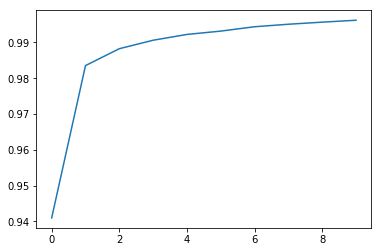

In [19]:
plt.plot(history.epoch,history.history['acc'],);

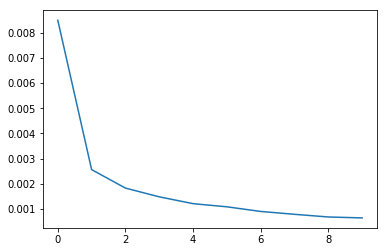

In [20]:
plt.plot(history.epoch,history.history['loss']);